# Notebook to:
- Visualize graphs
- See the Q table

In [1]:
# library imports
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import pandas as pd
# local imports
from environment import TreasureCube
from agents.RandomAgent import RandomAgent
from agents.QLearningAgent import QLearningAgent

In [2]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = QLearningAgent()
    episode_rewards = []
    for epsisode_num in tqdm(range(0, max_episode)):
        state = env.reset()
        terminate = False
        t = 0
        episode_reward = 0
        while not terminate:
            action = agent.take_action(state)
            # print(action)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            t += 1
            agent.train(state, action, next_state, reward)
            state = next_state
        # print(
        #     f'episode: {epsisode_num}, total_steps: {t} episode reward: {episode_reward}')
        episode_rewards.append(episode_reward)
    # plot =  showPlot(list(range(max_episode)), episode_rewards,
    #                 'episode', 'episode rewards')
    qTable = agent.getQTable()
    return episode_rewards, qTable


In [4]:
max_episode = 500
max_step = 500  
episode_rewards, qTable = test_cube(max_episode, max_step)

100%|██████████| 500/500 [00:00<00:00, 736.79it/s]


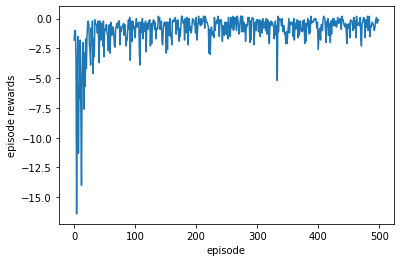

In [5]:
showPlot(range(max_episode), episode_rewards, xlabel='episode', ylabel= 'episode rewards')

In [6]:
# display entire Q table
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(qTable)

,right,left,forward,backward,up,down
000,-0.473351,-0.635142,-0.616054,-0.631015,-0.631852,-0.635428
001,-0.397704,-0.514977,-0.498110,-0.495865,-0.511043,-0.525640
002,-0.418912,-0.422932,-0.418326,-0.421649,-0.271670,-0.419780
003,-0.095770,-0.401273,-0.379019,-0.391651,-0.404570,-0.387042
010,-0.369357,-0.522238,-0.525256,-0.531475,-0.534033,-0.554811
011,-0.296779,-0.394796,-0.417003,-0.407995,-0.397474,-0.432518
012,-0.106924,-0.298509,-0.285056,-0.278578,-0.306854,-0.306409
013,0.000199,-0.247914,-0.255828,-0.262682,-0.263384,-0.271178
020,-0.233301,-0.407774,-0.396923,-0.360619,-0.425443,-0.408416
021,-0.306428,-0.335494,-0.300463,-0.307054,-0.091118,-0.317406
